In [72]:
import binascii
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

sns.set(style="ticks")

In [73]:
def filter_string(input_string, replace_char_idx):
    return input_string.replace(input_string[replace_char_idx], '')

In [74]:
filter_string('apples', 1)

'ales'

In [75]:
binascii.hexlify(b'apple')

b'6170706c65'

In [76]:
int(binascii.hexlify(b'apple'), 16)

418498243685

In [77]:
binascii.unhexlify(format(418498243685, 'x'))

b'apple'

In [78]:
len(format(418498243685, 'b'))

39

In [79]:
def gen_bit_string(length=8):
    """
    :param length: int
    :return: str
    """
    return ''.join([random.choice(['0', '1']) for _ in range(length)])

In [80]:
def gen_raw_int(size=8):
    """
    :param size: int
    :return: int
    """
    return int(gen_bit_string(size), 2)

In [81]:
def get_safe_strings(size=4):
    symbols = list('abcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()_-+=[]{};:\'"",.<>/?')
    return ''.join(random.sample(symbols, size))

In [143]:
def experiment():
    data = {
        'x': [],
        'f(x)': [],
        'input_len': [],
        'raw_string': [],
        'filter_idx': [],
        'output': []
    }
    for i in range(500):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        data['input_len'].append(len(random_string))
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x'].append(arg)
        
        idx = random.randint(0, len(random_string) - 1)
        data['filter_idx'].append(idx)
        
        output = filter_string(random_string, idx)
        data['output'].append(output)
        
        output_bytes = int(binascii.hexlify(output.encode('utf8')), 16)
        data['f(x)'].append(output_bytes)
        
    df = pd.DataFrame(data, columns=['x', 'f(x)', 'input_len', 'filter_idx', 'raw_string', 'output'])
    df['x'] = pd.to_numeric(df['x'])
    df['f(x)'] = pd.to_numeric(df['f(x)'])
    df['x'] = (df['x']-df['x'].min())/(df['x'].max()-df['x'].min())
    df['f(x)'] = (df['f(x)']-df['f(x)'].min())/(df['f(x)'].max()-df['f(x)'].min())
    return df

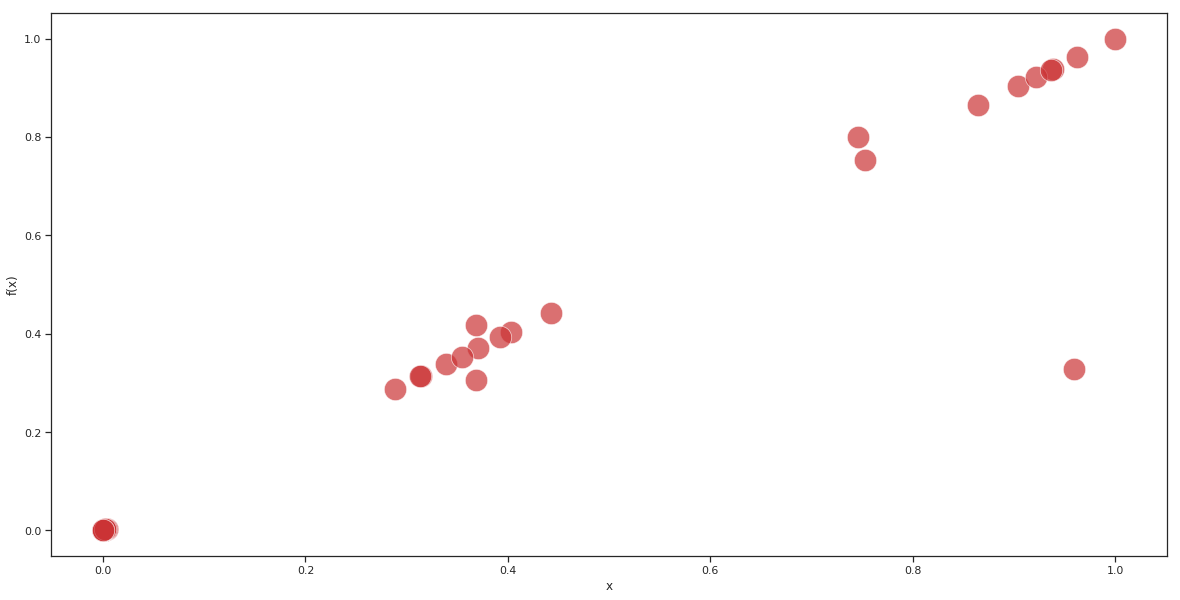

In [147]:
result = experiment()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x", y="f(x)", data=result, palette='Set2', s=500, alpha=0.7)

In [152]:
def experiment_join():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string_1': [],
        'raw_string_2': [],
        'output': []
    }
    for i in range(500):
        random_string_1 = get_safe_strings(size=random.randint(3, 20))
        data['raw_string_1'].append(random_string_1)

        random_string_2 = get_safe_strings(size=random.randint(3, 20))
        data['raw_string_2'].append(random_string_2)
        
        arg_1 = int(binascii.hexlify(random_string_1.encode('utf8')), 16)
        data['x1'].append(arg_1)
        
        arg_2 = int(binascii.hexlify(random_string_2.encode('utf8')), 16)
        data['x2'].append(arg_2)
        
        output = random_string_1 + random_string_2
        data['output'].append(output)
        
        output_bytes = int(binascii.hexlify(output.encode('utf8')), 16)
        data['f(x1, x2)'].append(output_bytes)

        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])
#         df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
#         df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
#         df['ff(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
    return df

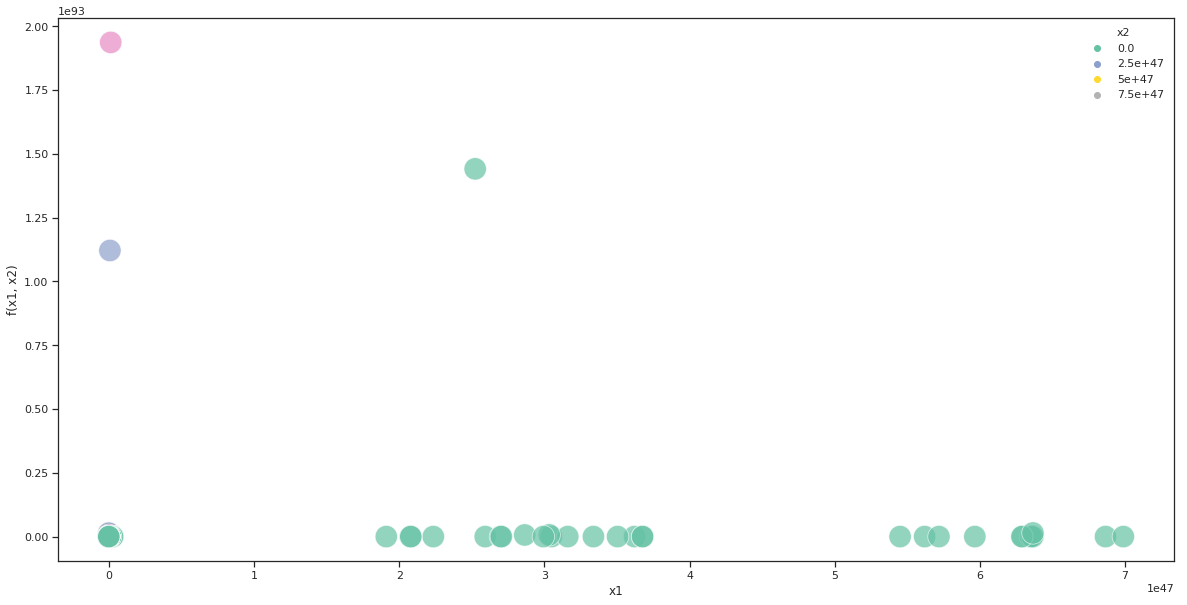

In [160]:
result = experiment_join()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x1", y="f(x1, x2)", data=result, hue="x2", palette='Set2', s=500, alpha=0.7)

In [159]:
result

,x1,x2,"f(x1, x2)"
0,2.071012e+09,1.096454e+21,9.780080e+30
1,1.147578e+14,8.337944e+44,6.551513e+59
2,1.684636e+11,1.386586e+45,9.617574e+56
3,9.417616e+08,7.670022e+18,1.737244e+28
4,1.170299e+21,9.019506e+32,6.076539e+54
5,3.232359e+28,5.782536e+23,3.907682e+52
6,5.318628e+13,6.499381e+35,7.069669e+49
7,1.338459e+28,1.557504e+38,4.554540e+66
8,1.804669e+23,3.102703e+40,1.572088e+64
9,2.161240e+21,6.726104e+13,6.083351e+35


In [86]:
def fib(n): 
    a = 0
    b = 1
    if n == 0:
        return a
    for i in range(n):
        c = a + b
        a = b
        b = c
    return b

In [87]:
def experiment():
    data = {
        'x': [],
        'f(x)': []
    }
    for i in range(1000):
        arg = random.randint(0, 10)
        data['x'].append(arg)
        output = fib(arg)
        data['f(x)'].append(output)
    df = pd.DataFrame(data, columns=['x', 'f(x)'])
    df = (df-df.min())/(df.max()-df.min())
    return df

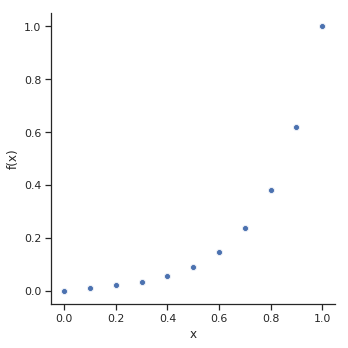

In [88]:
result = experiment()

sns.relplot(x="x", y="f(x)", data=result)

In [89]:
def str_search(haystack, needle):
    if needle in haystack:
        return haystack.index(needle)
    else:
        return -1

In [137]:
def experiment():
    data = {
        'x1': [],
        'x2': [],
        'f(x1, x2)': [],
        'raw_string': [],
        'search_string': []
    }
    for i in range(1000):
        random_length = random.randint(2, 20)
        random_string = get_safe_strings(size=random_length)

        data['raw_string'].append(random_string)
        
        arg = int(binascii.hexlify(random_string.encode('utf8')), 16)
        data['x1'].append(arg)
        
        
        search_string = random.sample(list(random_string), random.randint(0, 2))
        if len(search_string) == 0:
            search_string = get_safe_strings(size=2)
        else:
            search_string = ''.join(search_string)
        data['search_string'].append(search_string)
        
        arg = int(binascii.hexlify(search_string.encode('utf8')), 16)
        data['x2'].append(arg)
        
        output = str_search(random_string, search_string)

        data['f(x1, x2)'].append(output)
        
        df = pd.DataFrame(data, columns=['x1', 'x2', 'f(x1, x2)', 'raw_string', 'search_string'])
        df['x1'] = pd.to_numeric(df['x1'])
        df['x2'] = pd.to_numeric(df['x2'])
        df['f(x1, x2)'] = pd.to_numeric(df['f(x1, x2)'])

#         df['x1'] = (df['x1']-df['x1'].min())/(df['x1'].max()-df['x1'].min())
#         df['x2'] = (df['x2']-df['x2'].min())/(df['x2'].max()-df['x2'].min())
#         df['f(x1, x2)'] = (df['f(x1, x2)']-df['f(x1, x2)'].min())/(df['f(x1, x2)'].max()-df['f(x1, x2)'].min())
#         df['f(x1, x2)'].fillna(-1, inplace=True)
    return df

In [138]:
result = experiment()

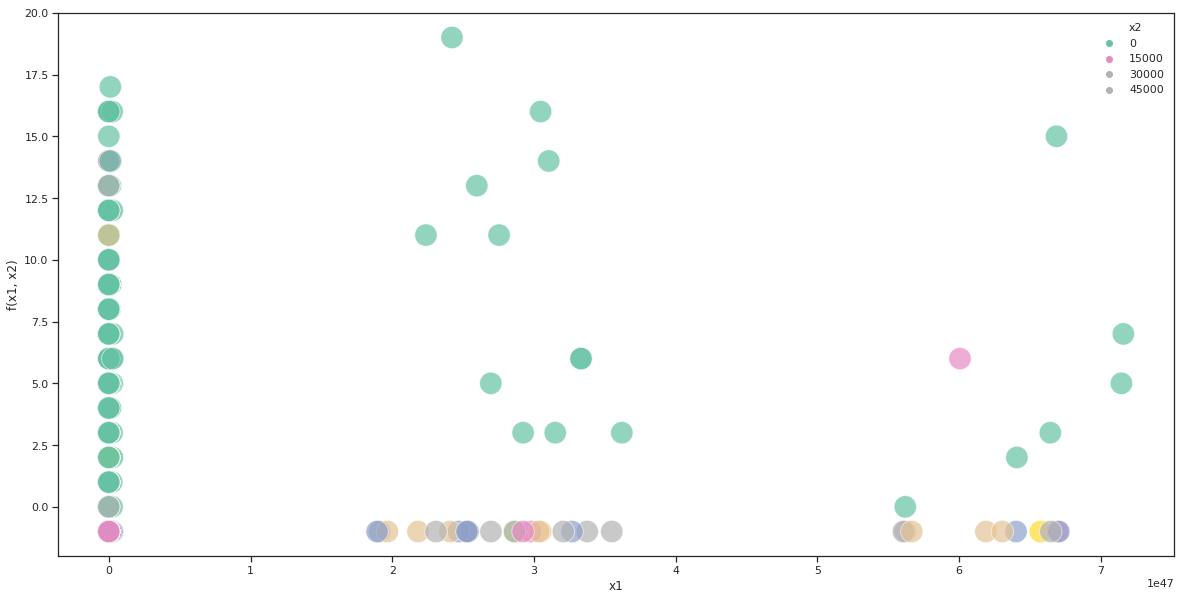

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, x="x1", y="f(x1, x2)", data=result, hue="x2", palette='Set2', s=500, alpha=0.7)

In [140]:
result

,x1,x2,"f(x1, x2)",raw_string,search_string
0,1.477178e+26,23906,-1,z0u5i?&9xo1,]b
1,4.141095e+06,26933,-1,?0',i5
2,1.029400e+04,14953,-1,(6,:i
3,1.017185e+16,9064,-1,"$#?,'h=",#h
4,3.262910e+28,16496,-1,"in(""[!a>ed;m",@p
5,1.106900e+04,61,1,+=,=
6,3.047492e+47,27998,-1,5am>eu_y&rl^3/z%]o6v,m^
7,7.432121e+18,118,6,g$2ca^v;,v
8,1.265400e+04,28209,-1,1n,n1
9,1.222829e+26,12577,-1,e&hw9p;.$8(,1!
